In [11]:
import nbimporter # to import methods from another notebook
import manta_file_processing as mfp
import numpy as np
import pandas as pd
from PIL import Image
import scipy
from matplotlib import pyplot as plt
import time, random, os

import multiprocessing as mp
from data_gen_process import image_heatmap_worker,create_datapoint

#https://github.com/portugueslab/arrayqueues 
from arrayqueues.arrayqueues.shared_arrays import ArrayQueue


In [12]:
from PIL import Image, ExifTags
def exif_rotate(image):
    try:
        #image=Image.open(filepath)
        for orientation in ExifTags.TAGS.keys():
            if ExifTags.TAGS[orientation]=='Orientation':
                break
        exif=dict(image._getexif().items())
        print(exif[orientation])
        if exif[orientation] == 3:
            image=image.rotate(180, expand=True)
        elif exif[orientation] == 6:
            image=image.rotate(270, expand=True)
        elif exif[orientation] == 8:
            image=image.rotate(90, expand=True)
        return image

    except (AttributeError, KeyError, IndexError):
        # cases: image don't have getexif
        return image

In [13]:
heatmap_order=("left-eye","right-eye","left-gill","right-gill","tail")
image_size=[100]*2
#heatmap_size=[33]*2

In [46]:
filename="manta_index.csv"

if os.name=="nt":
    folder="C:\\YandexDisk\\_QUT\\Project_1\\MAntas_imag\\0_manta_selected_annotated_some"
else:
    folder="/tf/notebooks/data/0_manta_selected_annotated_some"
print("os = "+os.name)
'''
if os.path.exists(filename):
    dataset=pd.read_csv(filename)
    print("loaded from ",filename)
else:
    print("folder: "+folder+"\n ---\ncollecting...")
    dataset=mfp.get_manta_files(folder=folder)
    dataset.to_csv(filename)
'''
print("folder: "+folder+"\n ---\ncollecting...")
dataset=mfp.get_manta_files(folder=folder)

df=dataset[dataset.body_landmark_path.isnull()==False]#.sample(frac=1)
manta_data=np.array(df[["image_path","body_landmark_path"]])
#data=np.array([df.image_path,df.body_landmark_path])
print("\nData shape=",manta_data.shape)

os = nt
folder: C:\YandexDisk\_QUT\Project_1\MAntas_imag\0_manta_selected_annotated_some
 ---
collecting...
total:1801
labelled:576

Data shape= (576, 2)


In [43]:
def check_dataset(manta_data):
    nrows=len(manta_data)//4+1
    len_size=round(20*nrows//4,0)
    fig, axes = plt.subplots(nrows=nrows, ncols=4,figsize=(20, len_size))
    i=0
    for im_path,blm_path in manta_data:
        im=Image.open(im_path)
        #im=exif_rotate(im)
        blm=body_landmarks=mfp.extract_body_landmarks(blm_path)
        #find centers
        centers=[]
        for b in blm["BLM"]:
            if b[0] in (heatmap_order):
                centers.append(b[1])
        centers=np.array(centers)
        xi=centers[:,0]
        yi=centers[:,1]
                             
        axes[i//4,i%4].imshow(im)
        axes[i//4,i%4].scatter(yi,xi,color='yellow')
        label=blm_path[-60:]
        label=label[:30]+"\n"+label[30:]
        axes[i//4,i%4].set_title(label)
        i+=1

In [47]:
filter="Etoile"
d=[m for m in manta_data if filter in m[0]]
len(d)

19

In [36]:
d=manta_data[:100]

Wall time: 9.74 s


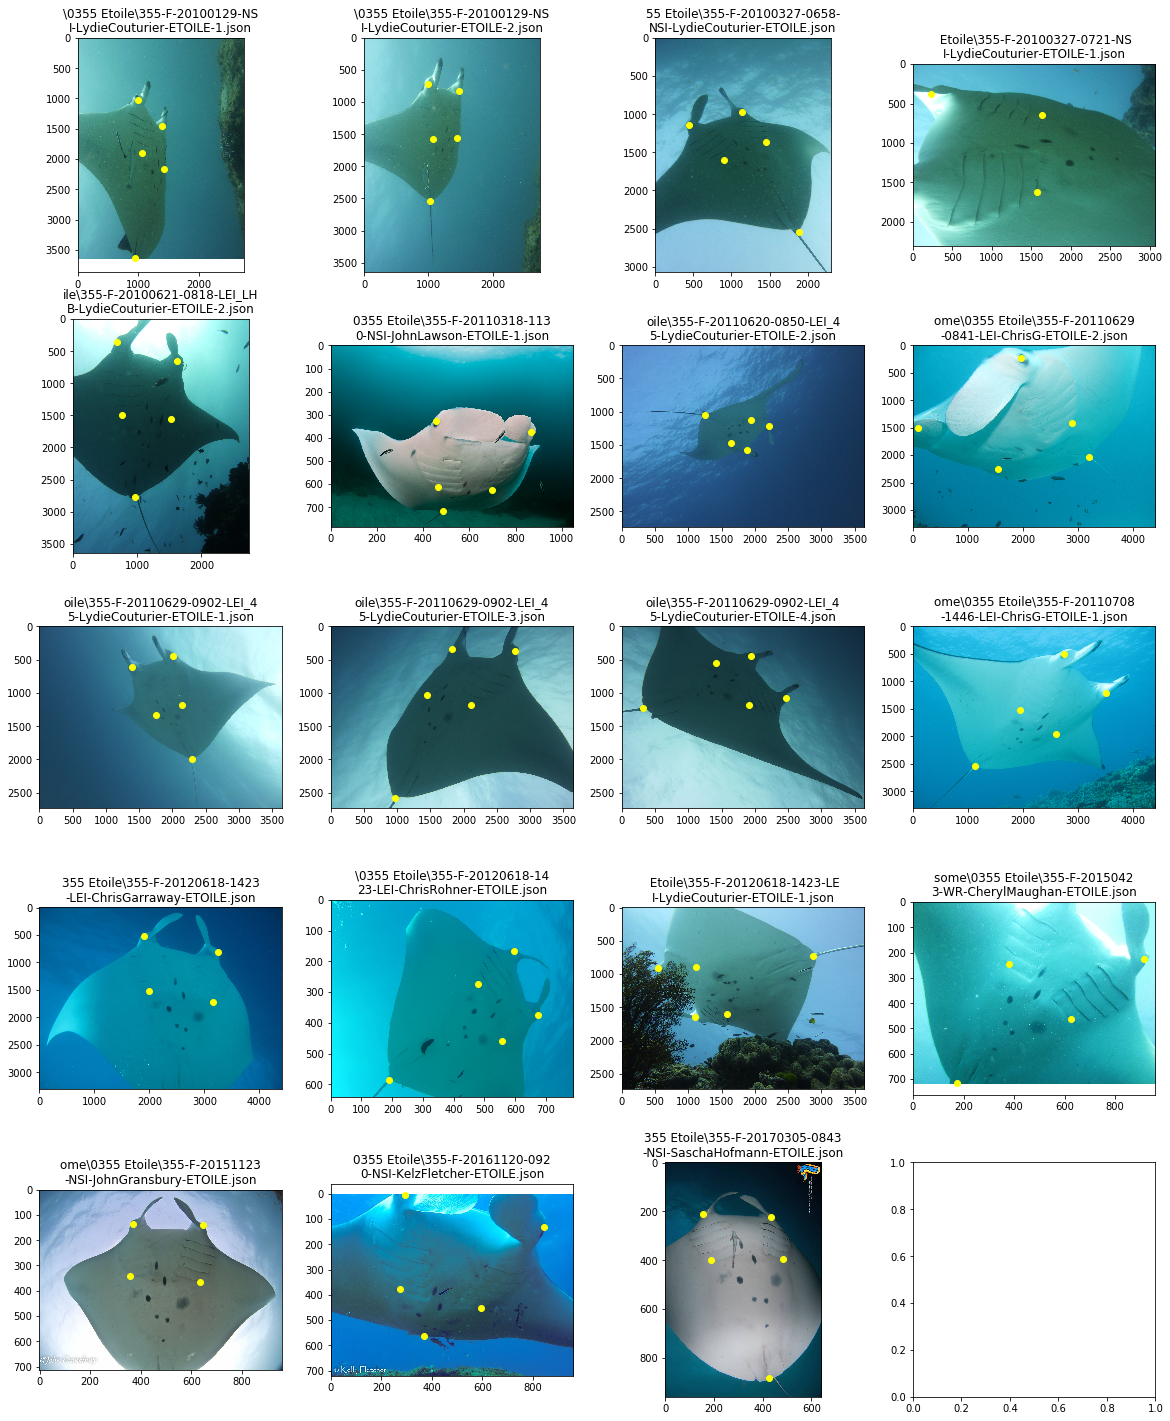

In [48]:
%%time
check_dataset(d)


In [ ]:
def plot_raw(image,body_landmarks):
    centers=[]
    for blm in body_landmarks["BLM"]:
        if blm[0] in (heatmap_order):
            centers.append(blm[1])
    centers=np.array(centers)
    xi=centers[:,0]
    yi=centers[:,1]
    plt.imshow(image)
    plt.scatter(yi,xi,color='yellow')